In [48]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [ ]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
%matplotlib inline

In [73]:
#read csv data
train = pd.read_csv('titanic_train.csv')

In [74]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# EDA

In [75]:
#exploring the columns and their data types
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [77]:
#null values are represented as True
train.isnull().head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False


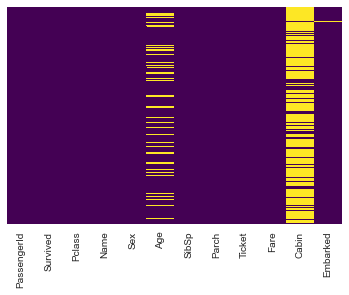

In [78]:
#Visualizing amount of nulls in each column
sns.heatmap(train.isnull(), yticklabels=False, cbar = False, cmap = 'viridis')
#looks like we have approx 20-30% nulls in Age column
#and aprrox 80-90% nulls in Cabin column

In [79]:
sns.set_style('whitegrid')

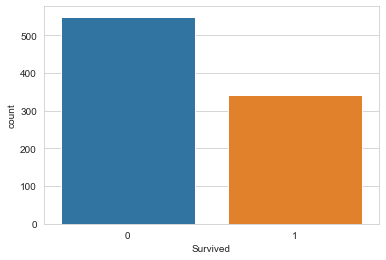

In [80]:
#visualising survival data
sns.countplot(x = 'Survived', data = train)
#looks like we have less survivors

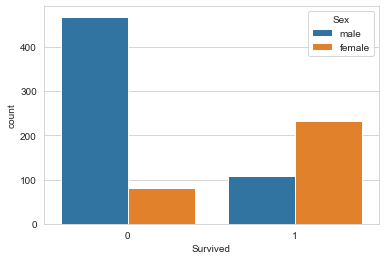

In [81]:
#visualizing survival based on gender
sns.countplot(x = 'Survived', data = train, hue = 'Sex')
#we can see that number of males that died is high as compared to females
#and the number of females that survived is higher than male
#the number of males on ship could be higher than females but this graph still gives us an idea on gender based survial

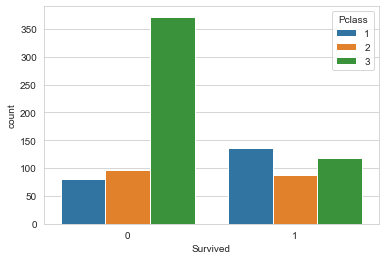

In [82]:
#visualizaing survival based on Passenger Class
sns.countplot(x = 'Survived', data = train, hue = 'Pclass')
#plot gives us an idea that most people that died were from class 3
#also, the number of people that survived were more from class 1
#number of passenger in each class also matters. It is obvious from plot that the number of people in class 3 would be much higher.

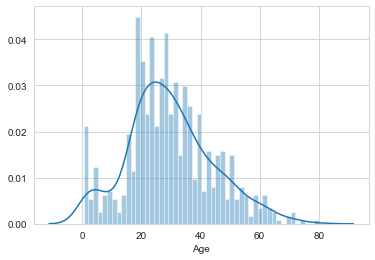

In [83]:
#visualizing distribution of age of the people on the ship by dropping the null values in Age column
sns.distplot(train['Age'].dropna(), bins = 50)
#the plot looks more or less normally distributed in the middle and skwed in the begining
#we can can deduce from the plot that most of the people were aged around 25-30 years old and quite a few younger people

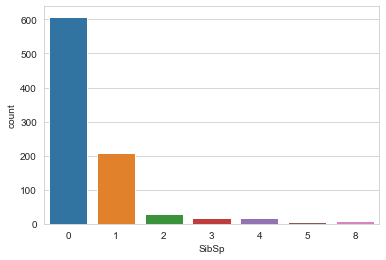

In [84]:
#visualizing SibSp column that would tell us about siblings, spouses onboard
sns.countplot(x='SibSp', data = train)
#plot shows that most of the people did not have spouse or siblings and a few had one, probably a spouse

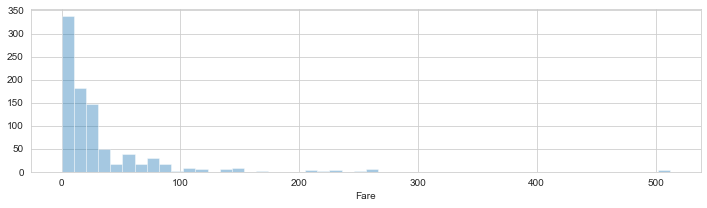

In [85]:
#visualizing Fare column data
plt.figure(figsize = (12, 3))
sns.distplot(train['Fare'], bins = 50, kde = False)
#from the distribution, we can see most tickets were priced around 10-50 bucks

Visualizing Fare using cufflinks for interactive plots

In [86]:
import cufflinks as cf

In [87]:
cf.go_offline()

In [88]:
train['Fare'].iplot(kind = 'hist', bins = 50)

# Cleaning Data

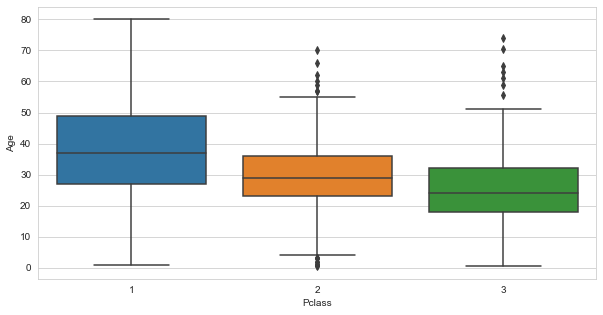

In [89]:
#we need fill the missing data in Age column
#we can either replace the null values by mean age of all passengers -- imputation
# Or we can fill the Age by average age of their respective passsenger class
plt.figure(figsize=(10, 5))
sns.boxplot(x = 'Pclass', y = 'Age', data = train)
#from the plot below, we can see that the average age of 1st class is higher than 2nd and 3rd
#and 2nd class avg age is also slightly higher than the 3rd class

In [90]:
#taking the mean age of each class
c1Age, c2Age, c3Age = train.groupby('Pclass')['Age'].mean()
print(c1Age, c2Age, c3Age)

38.233440860215055 29.87763005780347 25.14061971830986


In [92]:
#function to fill the null values of Age based on the class they belong
def fill_age(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return c1Age
        elif pclass == 2:
            return c2Age
        else:
            return c3Age
    else:
        return age

In [96]:
#applying the function to Age column
train['Age'] = train[['Age', 'Pclass']].apply(fill_age, axis=1)
#train.index.is_unique
#train.info()
#train.drop_duplicates(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


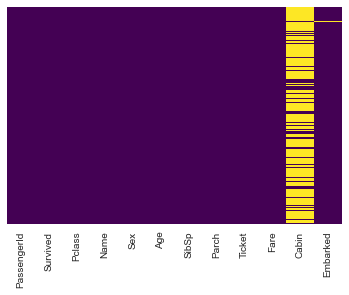

In [95]:
#Visualizing the age column null data
sns.heatmap(train.isnull(), yticklabels=False, cbar = False, cmap = 'viridis')
#we can see there are no more null values in our age column

In [97]:
#droping Cabin column as it contains too many null values
train.drop('Cabin', axis = 1, inplace= True)
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


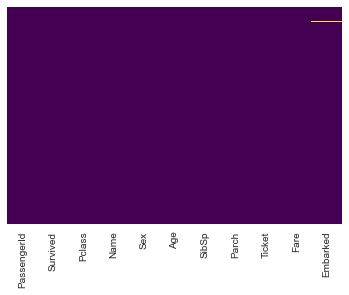

In [98]:
sns.heatmap(train.isnull(), yticklabels=False, cbar = False, cmap = 'viridis')
#no more Cabin column

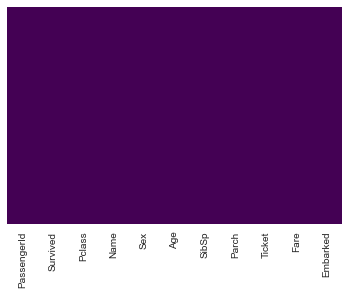

In [99]:
#droping the ramaining null values. In our case it's only in Embarked col
train.dropna(inplace = True)
#visualizing again to check if there are no nulls in data now
sns.heatmap(train.isnull(), yticklabels=False, cbar = False, cmap = 'viridis')
#looks good

In [100]:
#converting the categorial columns to indicator/dummy value columns to be fed to the model
#if one is not male, then it means that she will be a female. This means, one column is the perfect predictor of the second column. 
#We do not want this in our model as it can cause the issue of multi colinearity, hence, we will drop the first column
sex = pd.get_dummies(train['Sex'], drop_first=True)
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [103]:
#print(sex.info())
#print(sex.head(2))
print(embark.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Q       889 non-null    uint8
 1   S       889 non-null    uint8
dtypes: uint8(2)
memory usage: 8.7 KB
None


In [55]:
embark.head(2)

,Q,S
0,0,1
1,0,0


In [105]:
#adding the columns back to our train df
train = pd.concat([train, sex, embark], axis = 1)
train.info(2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
 11  male         889 non-null    uint8  
 12  Q            889 non-null    uint8  
 13  S            889 non-null    uint8  
dtypes: float64(2), int64(5), object(4), uint8(3)
memory usage: 85.9+ KB


In [106]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1


In [111]:
#dropping the columns not required for passing to the model for training
train.drop(['Name', 'Sex', 'Ticket', 'Embarked'], axis = 1, inplace = True)
train.drop(['PassengerId'], axis = 1, inplace = True)
train.head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1


# Applying Logistic Regression

In [112]:
X = train.drop('Survived', axis = 1)
y = train['Survived']

In [113]:
from sklearn.model_selection import train_test_split

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [115]:
from sklearn.linear_model import LogisticRegression

In [116]:
logm = LogisticRegression()

In [117]:
logm.fit(X_train, y_train)

C:\Users\NEO\anaconda3\envs\DataScience\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [118]:
preds = logm.predict(X_test)

In [124]:
#model evaluation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [125]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       163
           1       0.84      0.70      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267



In [126]:
confusion_matrix(y_test, preds)

array([[149,  14],
       [ 31,  73]], dtype=int64)